In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [69]:
PATH = "winemag_processed.csv"
DATASET_SIZE = 10000
dataset = pd.read_csv(PATH)
dataset = dataset.head(DATASET_SIZE)

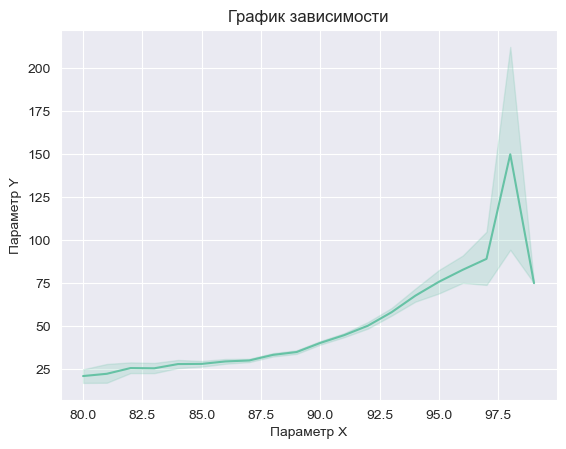

In [71]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(
    x=dataset["points"],
    y=dataset["price"],
)
plt.title('График зависимости')
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()


In [72]:
x = np.array(dataset["points"]).reshape(-1, 1)
y = np.array(dataset["price"]).reshape(-1, 1)

In [73]:
DEGREES = 4

regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 564.9843025176679


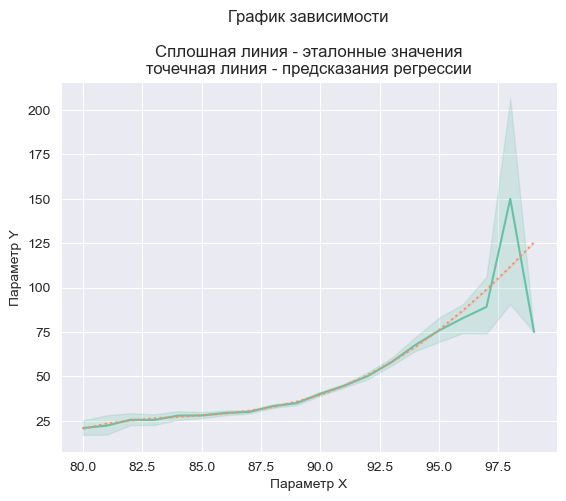

In [77]:
sns.lineplot(
    x=dataset["points"],
    y=dataset["price"],
    linestyle="solid"
)
sns.lineplot(
    x=dataset["points"],
    y=predictions.reshape(-1),
    linestyle="dotted"
)
plt.title(
    'График зависимости\n\n'
    'Сплошная линия - эталонные значения\n'
    'точечная линия - предсказания регрессии'
)
plt.xlabel('Параметр X')
plt.ylabel('Параметр Y')
plt.show()

In [78]:
x_parameters = np.append(
    regression['linearregression'].intercept_[0],
    regression['linearregression'].coef_[0][1:]
)
x_parameters

array([-8.88907710e+04,  3.91161103e+03, -6.41308222e+01,  4.63794774e-01,
       -1.24617121e-03])

In [85]:
'''Для описания зависимости оценки вина от цены был выбран полиномиальная регрессия 4 степени. Поэтому среднеквадратичная ошибка была не большой. Сравнение фактических и предсказанных значений на графике показывает хорошее качество предсказаний. '''

'Для описания зависимости оценки вина от цены был выбран полиномиальная регрессия 4 степени. Поэтому среднеквадратичная ошибка была не большой. Сравнение фактических и предсказанных значений на графике показывает хорошее качество предсказаний. '